In [1]:
from scipy.spatial.distance import euclidean
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# please change to your own dir
coord_filename = '/home/xli5/KTH-traces/KTH_data/building_index_to_coordinates.dat'
output_filename = '/home/xli5/KTH-traces/AdaTrace/Outputs/kth/full_day/building_level/default_budget/03-03_output_rounded/03-03_eps20.0_rounded.dat'
boundary = 2000

In [3]:

bldg_coord_to_index_map = {}
with open(coord_filename, 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        index, x, y = line.strip().split(',')
        bldg_coord_to_index_map[(int(x), int(y))] = int(index)

# bldg_coord_to_index_map

In [4]:
output_coordinates = []
with open(output_filename, 'r') as file:
    for line in file:
        if line.startswith('>'):
            _, coords_str = line.strip().split(':')
            coords = coords_str.split(';')[:-1]  # Remove the last empty string
            for coord in coords:
                x, y = map(int, coord.split(','))
                output_coordinates.append((x, y))

# output_coordinates


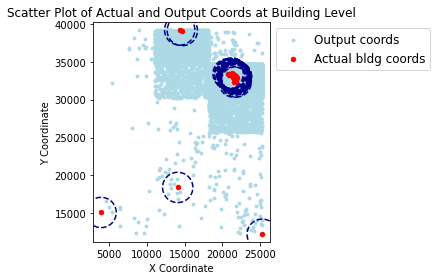

In [5]:
fig, ax = plt.subplots()
actual_bldg_coords_lst = np.array([list(i) for i in list(bldg_coord_to_index_map.keys())])
output_coordinates_lst = np.array([list(i) for i in output_coordinates])

ax.scatter(output_coordinates_lst[:, 0], output_coordinates_lst[:, 1], color='lightblue', label='Output coords', s=15, linewidths=0)
ax.scatter(actual_bldg_coords_lst[:, 0], actual_bldg_coords_lst[:, 1], color='red', label='Actual bldg coords', s=20)


# Plot a circle with radius 10 around each point in A
for point in actual_bldg_coords_lst:
    circle = plt.Circle((point[0], point[1]), boundary, color='darkblue', fill=False, linestyle='dashed', linewidth=1.5)
    ax.add_artist(circle)

# Set aspects
ax.set_aspect('equal', adjustable='datalim')
plt.axis('scaled')

# Adjusting the axis limits to be a bit broader than the min and max of A and B
all_points = np.concatenate((actual_bldg_coords_lst, output_coordinates_lst), axis=0)
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()
ax.set_xlim(x_min - 1000, x_max + 1000)
ax.set_ylim(y_min - 1000, y_max + 1000)

# Setting labels and legend
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of Actual and Output Coords at Building Level')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='large')  # Adjust legend position and size

# Adjust layout to make space for the legend outside the plot
plt.tight_layout()

# Show plot
plt.show()

In [6]:
output_coord_to_approx_bd = {}
unmatched_output_coord = []
distance = []
unmapped_dist = []
for output_coord in output_coordinates:
    min_dist = 1e6
    closest_bldg_index = -1
    for bldg_coord, bldg_index in bldg_coord_to_index_map.items():
        dist = euclidean(output_coord, bldg_coord)
        if dist < min_dist:
            min_dist = dist
            closest_bldg_index = bldg_index
    distance.append(min_dist)
    if min_dist < boundary:
        output_coord_to_approx_bd[output_coord] = closest_bldg_index
    else:
        unmatched_output_coord.append(output_coord)
        unmapped_dist.append(min_dist)


print("mapped coords count:", len(output_coord_to_approx_bd))
print("unmapped coords count:", len(unmatched_output_coord))
  

mapped coords count: 8440
unmapped coords count: 10044


In [7]:
df = pd.DataFrame(distance)
df.describe()

,0
count,18485.000000
mean,2291.438574
std,1399.154035
min,3.605551
25%,1281.688340
50%,2136.141615
75%,3070.629414
max,11302.892550


In [14]:
df = pd.DataFrame(unmapped_dist)
df.describe()

,0
count,10044.000000
mean,3254.922912
std,1147.000625
min,2000.143995
25%,2443.327898
50%,2976.136925
75%,3638.886607
max,11302.892550


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

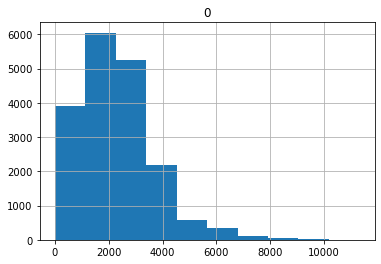

In [8]:
df.hist()